Does PAH correctly pass from one cohort to another during the vertebrate aging in the Salish Sea Atlantis Model?

### Test Descriptions & Notes

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot
from PIL import Image
import glob
from IPython.display import Image as img
from mpl_toolkits.axes_grid1 import make_axes_locatable

Need to test the transfer of contaminants with vertebrate aging. To do this, we need to:
- find out the timing of vertebrate aging
- release contaminants right before vertebrates age
- track the release and the aging using 1-day output (highres)

From Biology.prm file
Recruitment of young
- Most fish recruit within 60 days, so should be visible in 90 day runs from the model start time.
examples
- larger vertebrates recruit after 300 - 360 days. To catch this, we'll put the contaminant spill at day 300, and run 1-day high resolution output for 90 days. 
    - SHD_Recruit_Time  360  Length of period until hatching for Dogfish
    - SRA_Recruit_Time  360  Length of period until birth for Ratfish
    - SHS_Recruit_Time  360  Length of period until birth for Sixgill
    - SSK_Recruit_Time  360  Length of period until hatching for Skates & rays
    - HSL_Recruit_Time  330  Length of gestation period for Harbor_seals
    - CSL_Recruit_Time   360  Length of gestation period for Sealions
    - WHB_Recruit_Time  300  Length of gestation period for Humpbak whales
    - ORT_Recruit_Time  360  Length of gestation period for Orca_transient
    - PHR_Recruit_Time  360  Length of gestation period for Harbor_porpoise
    - ORR_Recruit_Time  360  Length of gestation period for Orca_resident

In [2]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/7a_v6699_1000kg_360d_highres_daily_control/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)
time = np.ma.filled(control.variables['t'], np.nan)

In [3]:
# Read in salish sea atlantis output files.
scenario_root = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/')
scenario_paths = sorted([p for p in scenario_root.glob('7a_v6699_1000kg_360d_highres_daily/outputSalishSea.nc')])
scenario_datasets = [xr.open_dataset(scen,decode_cf=True) for scen in scenario_paths]

In [4]:
scenario_paths

[PosixPath('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/7a_v6699_1000kg_360d_highres_daily/outputSalishSea.nc')]

In [5]:
for scenario in scenario_datasets:
    time = np.ma.filled(scenario.variables['t'], np.nan)

In [45]:
def plot_group(group, scenario_datasets, scenario_paths):
    for scenario, path in zip(scenario_datasets, scenario_paths):
        fig, ax = plt.subplots(figsize = (14,3))
        nm = path.parent.stem
        for variable in group:
            contam_tbl = np.ma.filled(scenario.variables[variable], np.nan)
            volume_tbl = np.ma.filled(scenario.volume, np.nan)
            contam_mass_tbl = contam_tbl * volume_tbl
            contam_mass_tb = contam_mass_tbl.sum(axis=2)
            contam_mass_t = contam_mass_tb.sum(axis=1)
            ax.plot(time, contam_mass_t/1e6)
        ax.legend(group,  loc='best')
        ax.set_ylabel('mass (kg)')
        ax.set_xlabel('Time')
        ax.set_title(nm)

In [7]:
def plot_group_nums(group, scenario_datasets, scenario_paths):
    for scenario, path in zip(scenario_datasets, scenario_paths):
        fig, ax = plt.subplots(figsize = (14,3))
        nm = path.parent.stem
        for variable in group:
            contam_tbl = np.ma.filled(scenario.variables[variable +'_Nums'], np.nan)
            contam_tb = contam_tbl.sum(axis=2)
            contam_t = contam_tb.sum(axis=1)
            ax.plot(time, contam_t)
        ax.legend(group,  loc='best')
        ax.set_ylabel('Numbers')
        ax.set_xlabel('Time')
        ax.set_title(nm)

In [8]:
time[0]

numpy.datetime64('1992-12-25T14:00:00.000000000')

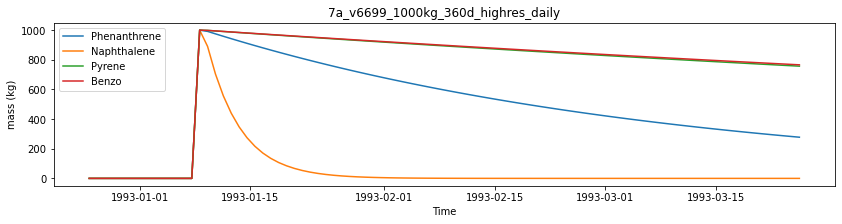

In [46]:
plot_group(groups.pahs, scenario_datasets, scenario_paths)

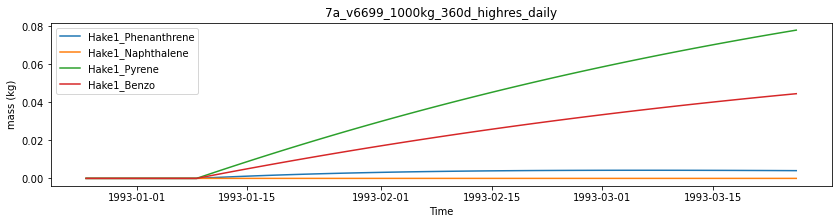

In [47]:
new_group = {}
for pah in groups.pahs:
    new_group['Hake1_'+pah]= 'Hake1_' +pah
plot_group(new_group, scenario_datasets, scenario_paths)

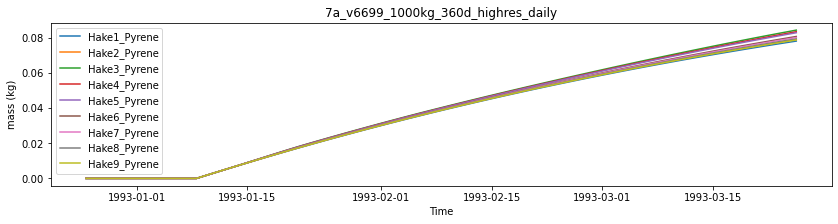

In [48]:
new_group = {}
for cohort in range (1, groups.cohorts['Hake']):
    new_group['Hake'+str(cohort)+'_Pyrene']= 'Hake'+str(cohort)+'_Pyrene'
plot_group(new_group, scenario_datasets, scenario_paths)

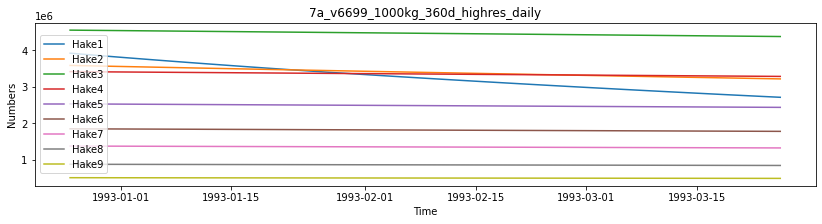

In [49]:
new_group = {}
for cohort in range (1, groups.cohorts['Hake']):
    new_group['Hake'+str(cohort)]= 'Hake'+str(cohort)
plot_group_nums(new_group, scenario_datasets, scenario_paths)

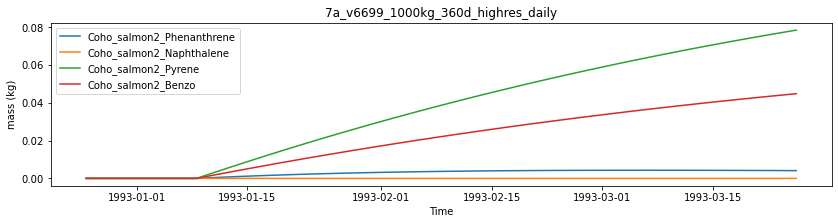

In [50]:
new_group = {}
for pah in groups.pahs:
    new_group['Coho_salmon2_'+pah]= 'Coho_salmon2_'+pah
plot_group(new_group, scenario_datasets, scenario_paths)

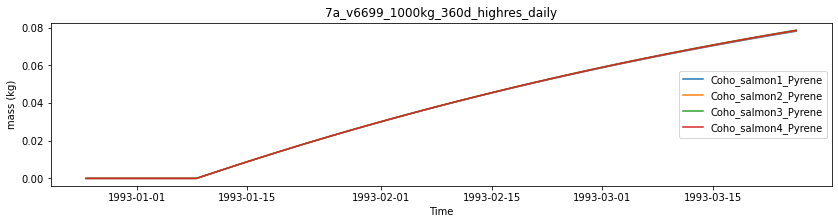

In [14]:
new_group = {}
for cohort in range (1, groups.cohorts['Coho_salmon']):
    new_group['Coho_salmon'+str(cohort)+'_Pyrene']= 'Coho_salmon'+str(cohort)+'_Pyrene'
plot_group(new_group, scenario_datasets, scenario_paths)

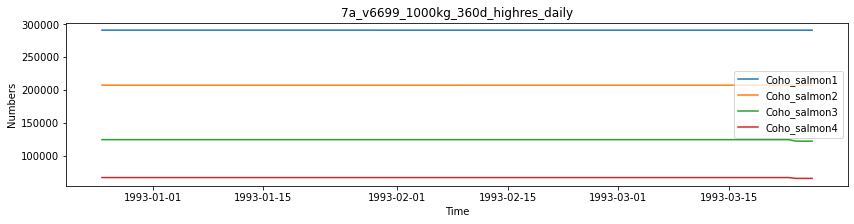

In [15]:
new_group = {}
for cohort in range (1, groups.cohorts['Coho_salmon']):
    new_group['Coho_salmon'+str(cohort)]= 'Coho_salmon'+str(cohort)
plot_group_nums(new_group, scenario_datasets, scenario_paths)

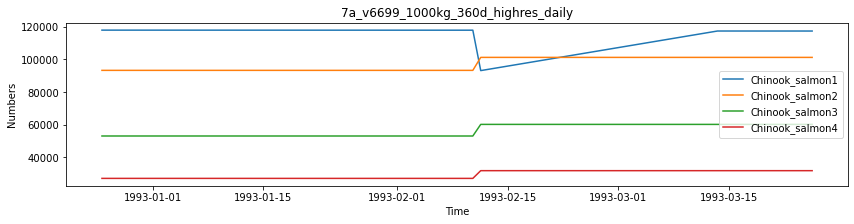

In [17]:
new_group = {}
for cohort in range (1, groups.cohorts['Chinook_salmon']):
    new_group['Chinook_salmon'+str(cohort)]= 'Chinook_salmon'+str(cohort)
plot_group_nums(new_group, scenario_datasets, scenario_paths)

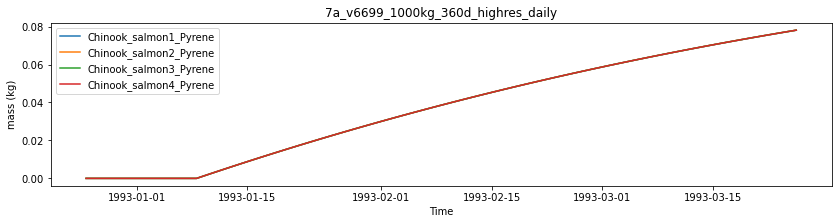

In [57]:
new_group = {}
for cohort in range (1, groups.cohorts['Chinook_salmon']):
    new_group['Chinook_salmon'+str(cohort)+'_Pyrene']= 'Chinook_salmon'+str(cohort)+'_Pyrene'
plot_group(new_group, scenario_datasets, scenario_paths)

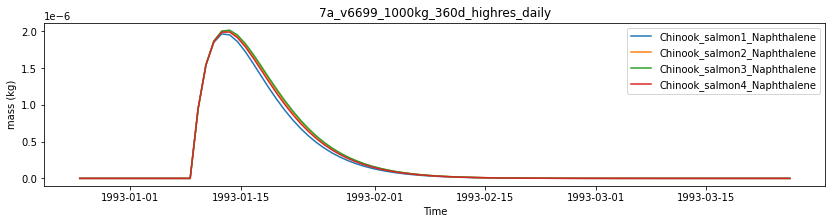

In [58]:
new_group = {}
for cohort in range (1, groups.cohorts['Chinook_salmon']):
    new_group['Chinook_salmon'+str(cohort)+'_Naphthalene']= 'Chinook_salmon'+str(cohort)+'_Naphthalene'
plot_group(new_group, scenario_datasets, scenario_paths)

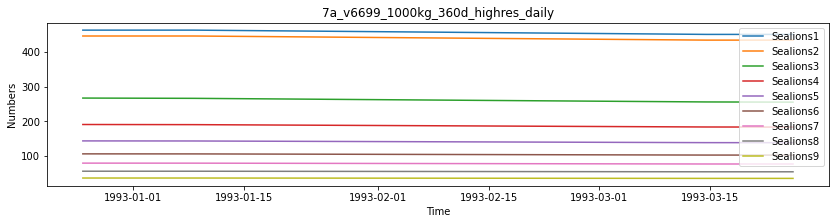

In [19]:
new_group = {}
for cohort in range (1, groups.cohorts['Sealions']):
    new_group['Sealions'+str(cohort)]= 'Sealions'+str(cohort)
plot_group_nums(new_group, scenario_datasets, scenario_paths)

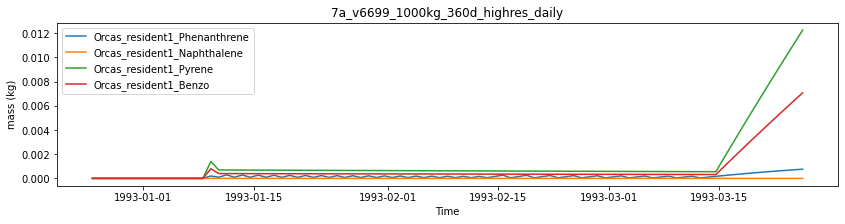

In [52]:
new_group = {}
for pah in groups.pahs:
    new_group['Orcas_resident1_'+pah]= 'Orcas_resident1_'+pah
plot_group(new_group, scenario_datasets, scenario_paths)

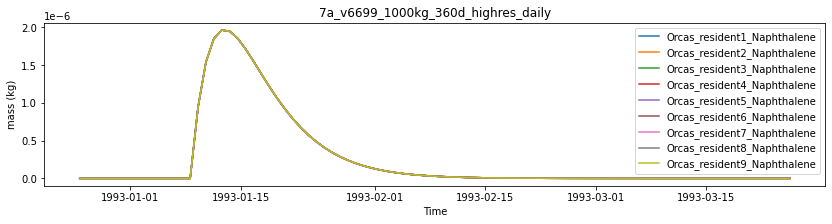

In [55]:
new_group = {}
for cohort in range (1, groups.cohorts['Orcas_resident']):
    new_group['Orcas_resident'+str(cohort)+'_Naphthalene']= 'Orcas_resident'+str(cohort)+'_Naphthalene'
plot_group(new_group, scenario_datasets, scenario_paths)

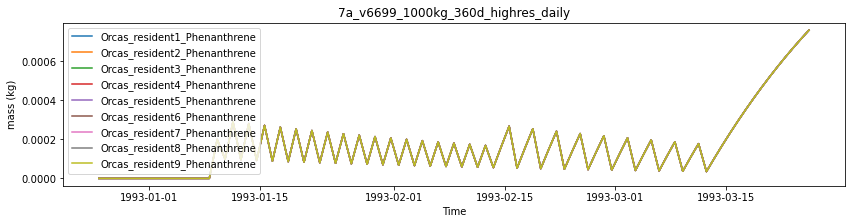

In [56]:
new_group = {}
for cohort in range (1, groups.cohorts['Orcas_resident']):
    new_group['Orcas_resident'+str(cohort)+'_Phenanthrene']= 'Orcas_resident'+str(cohort)+'_Phenanthrene'
plot_group(new_group, scenario_datasets, scenario_paths)

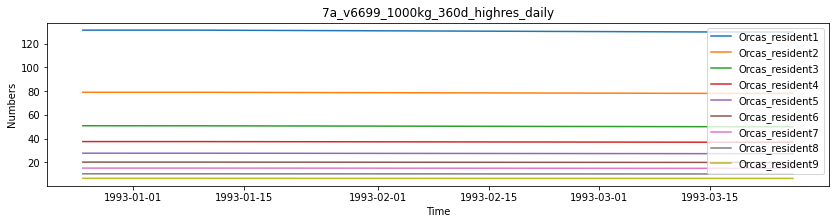

In [21]:
new_group = {}
for cohort in range (1, groups.cohorts['Orcas_resident']):
    new_group['Orcas_resident'+str(cohort)]= 'Orcas_resident'+str(cohort)
plot_group_nums(new_group, scenario_datasets, scenario_paths)

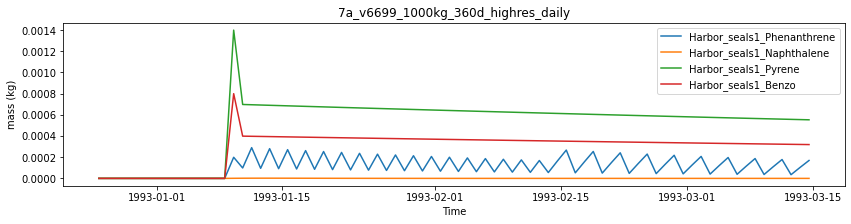

In [42]:
new_group = {}
for pah in groups.pahs:
    new_group['Harbor_seals1_'+pah]= 'Harbor_seals1_'+pah
plot_group(new_group, scenario_datasets, scenario_paths)

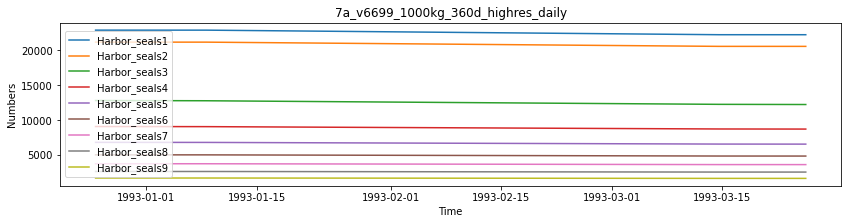

In [24]:
new_group = {}
for cohort in range (1, groups.cohorts['Harbor_seals']):
    new_group['Harbor_seals'+str(cohort)]= 'Harbor_seals'+str(cohort)
plot_group_nums(new_group, scenario_datasets, scenario_paths)

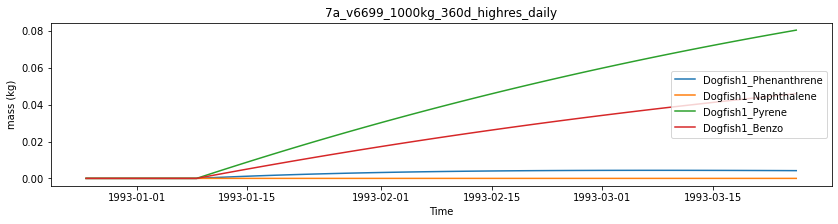

In [26]:
new_group = {}
for pah in groups.pahs:
    new_group['Dogfish1_'+pah]= 'Dogfish1_'+pah
plot_group(new_group, scenario_datasets, scenario_paths)

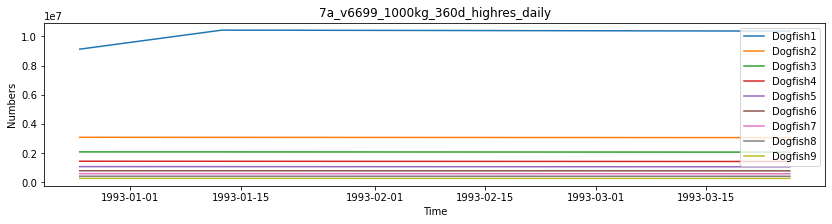

In [27]:
new_group = {}
for cohort in range (1, groups.cohorts['Dogfish']):
    new_group['Dogfish'+str(cohort)]= 'Dogfish'+str(cohort)
plot_group_nums(new_group, scenario_datasets, scenario_paths)

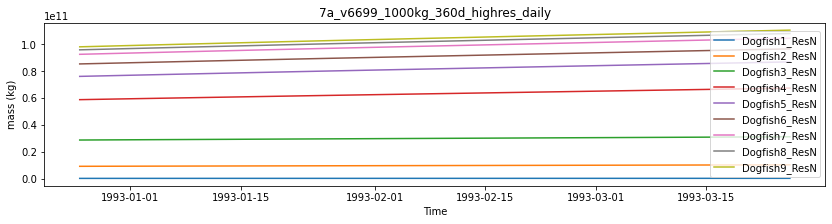

In [28]:
new_group = {}
for cohort in range (1, groups.cohorts['Dogfish']):
    new_group['Dogfish'+str(cohort)+'_ResN']= 'Dogfish'+str(cohort)+'_ResN'
plot_group(new_group, scenario_datasets, scenario_paths)

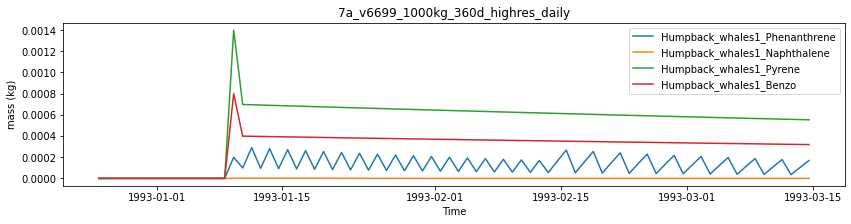

In [41]:
new_group = {}
for pah in groups.pahs:
    new_group['Humpback_whales1_'+pah]= 'Humpback_whales1_'+pah
plot_group(new_group, scenario_datasets, scenario_paths)

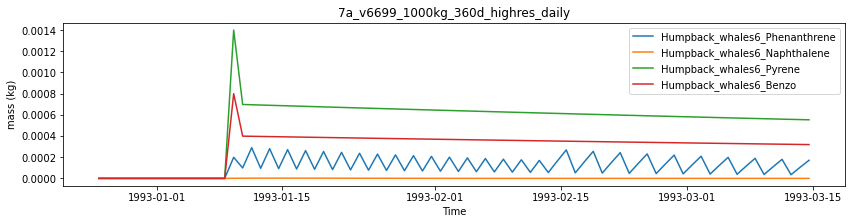

In [40]:
new_group = {}
for pah in groups.pahs:
    new_group['Humpback_whales6_'+pah]= 'Humpback_whales6_'+pah
plot_group(new_group, scenario_datasets, scenario_paths)

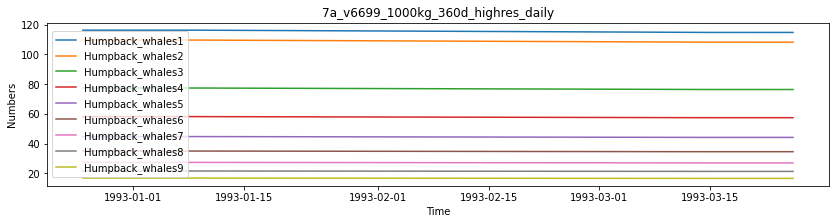

In [31]:
new_group = {}
for cohort in range (1, groups.cohorts['Humpback_whales']):
    new_group['Humpback_whales'+str(cohort)]= 'Humpback_whales'+str(cohort)
plot_group_nums(new_group, scenario_datasets, scenario_paths)

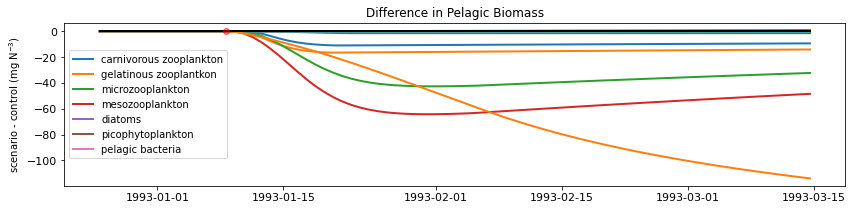

In [65]:
for scenario in scenario_datasets:
    splot.difference_between_scenario_and_control_pelagic(groups.plankton, scenario, control, time, 0, 80, groups.salish_sea, time[14])


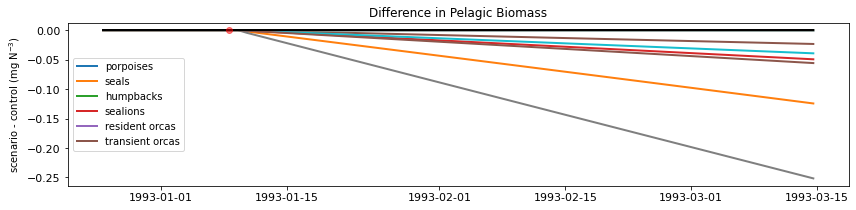

In [66]:
for scenario in scenario_datasets:
    splot.difference_between_scenario_and_control_pelagic(groups.mammals, scenario, control, time, 0, 80, groups.salish_sea, time[14])
